# Problem 1: Compressive Sensing

### 1(a)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxpy as cp

In [3]:
with open('wonderland-tree.txt', 'r') as f:
    lines = f.read().splitlines()

tree = np.array([list(line) for line in lines], dtype=int)
tree = tree.flatten()

In [4]:
print(np.max(tree))
print(tree.shape)
print(np.sum(tree))
print(np.sum(tree) / np.prod(tree.shape))

1
(1200,)
252
0.21


### 1(b)

In [5]:
A = np.random.normal(size=(1200,1200))
print(A.shape)
print(A)

(1200, 1200)
[[-0.72220194  0.58768228  0.29191755 ... -0.68223382 -0.3522608
  -1.50922359]
 [-1.51497144 -0.12146637 -0.31860723 ...  0.5346237   0.68800552
  -0.94151188]
 [ 0.72505667  1.13442029  0.91810682 ...  1.11976577  0.38929277
  -0.48548836]
 ...
 [ 0.45928    -1.54921683  0.19982182 ...  1.13692567  0.60186037
   1.60937378]
 [-0.1442444  -0.99220375  1.56372381 ...  1.85430437  0.29317593
  -0.8819517 ]
 [ 0.77702996 -0.45654997 -0.65322232 ... -0.30943113 -1.8907414
  -0.16625719]]


In [21]:
def approx_x(A, r):
    A_r = A[:r]
    print(A_r.shape)
    b_r = A_r @ tree
    n = A.shape[1]
    x = cp.Variable(n)
    y = cp.Variable(n)
    objective = cp.Minimize(cp.sum(y))

    tol = 1e-9
    constraints = [
        A_r @ x >= b_r - tol,
        A_r @ x <= b_r + tol,
        y >= x - tol,
        y >= -x + tol
    ]
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.ECOS, reltol=1e-6)

    print("Status:", problem.status)
    print("Optimal value:", problem.value)
    print("Optimal x:", x.value)
    return x.value
x_700 = approx_x(A,700)

(700, 1200)
Status: optimal
Optimal value: 251.9999996753508
Optimal x: [ 4.96889567e-10  9.61715595e-10  5.84514105e-12 ... -3.44753225e-10
 -3.32130332e-09 -6.87887599e-09]


In [22]:
print(np.allclose(x_700, tree, atol=1e-6))
print(np.linalg.norm(x_700 - tree, 1))

True
7.670469068797316e-06


### 1(c)

In [28]:
def find_min_r(A):
    low = 1
    high = 700
    best_r = high

    while low <= high:
        mid = (low + high) // 2
        print(f"Trying r = {mid}")

        x_approx = approx_x(A, mid)

        norm_diff = np.linalg.norm(x_approx - tree, 1)
        print(f"L1 Norm Difference: {norm_diff}")

        if norm_diff <= 1e-3:
            best_r = mid
            high = mid - 1
        else:
            low = mid + 1

    print(f"Minimum r found: {best_r}")
    return best_r

In [ ]:
find_min_r(A)

### 1(d)

In [19]:
r_star = 658
rs = np.arange(r_star-10, r_star+3)
print(rs)
differences = []
for r in rs:
    x_approx = approx_x(A, r)
    norm_diff = np.linalg.norm(x_approx - tree, 1)
    differences.append(norm_diff)

[648 649 650 651 652 653 654 655 656 657 658 659 660]
(648, 1200)
Status: optimal
Optimal value: 251.26558647264784
Optimal x: [ 4.23433295e-10  5.91987398e-02  5.58677495e-02 ... -6.21389302e-09
  7.65643957e-09 -1.51350340e-01]
(649, 1200)
Status: optimal
Optimal value: 251.34597677501182
Optimal x: [-1.65560230e-09  4.86528075e-02  9.88594545e-02 ... -3.38746424e-09
  1.03005680e-08 -7.33345917e-02]
(650, 1200)
Status: optimal
Optimal value: 251.38029495446347
Optimal x: [-1.78450427e-09  4.51942635e-02  9.55491345e-03 ... -1.89105489e-09
  5.41517087e-09 -1.06895324e-01]
(651, 1200)
Status: optimal
Optimal value: 251.3810689094149
Optimal x: [ 1.43741720e-10  5.31515313e-02  3.33405696e-02 ...  4.71841560e-10
  1.84430593e-09 -1.06186624e-01]
(652, 1200)
Status: optimal
Optimal value: 251.72439367647297
Optimal x: [-2.77156359e-09  1.09434933e-01  9.05115688e-02 ...  6.84758148e-09
  8.58169513e-10 -2.17496979e-01]
(653, 1200)
Status: optimal
Optimal value: 251.73370963296037
Optim

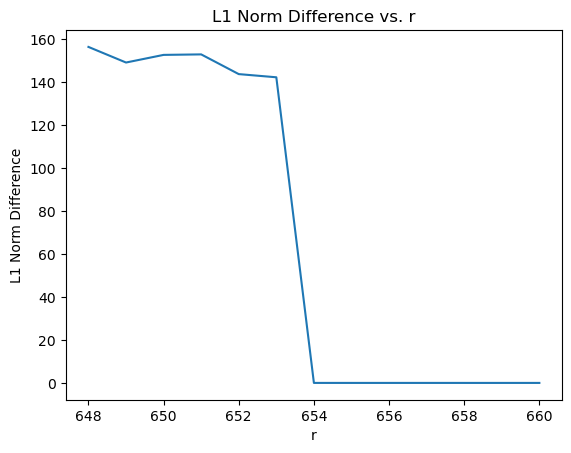

In [20]:
plt.plot(rs, differences)
plt.xlabel("r")
plt.ylabel("L1 Norm Difference")
plt.title("L1 Norm Difference vs. r")
plt.show()

This is a gigantic dropoff. From like 160 l1 norm difference to 0 in one iteration. Wow.

### 1(e)

In [26]:
def bernoulli_A(p):
    return np.random.choice([-1.,1.,0.], p=[p/2, p/2, 1-p], size=(1200,1200))

def r_hat(p):
    rs = [find_min_r(bernoulli_A(p)) for _ in range(5)]
    return np.mean(rs)

In [29]:
print(r_hat(0.5))

Trying r = 350
(350, 1200)
Status: optimal
Optimal value: 178.74223675034094
Optimal x: [4.03836850e-08 1.42682038e-09 1.15320284e-09 ... 3.00942310e-09
 6.92908919e-10 1.12057084e-09]
L1 Norm Difference: 278.0569512991081
Trying r = 525
(525, 1200)
Status: optimal_inaccurate
Optimal value: 232.78518925911447
Optimal x: [ 4.96605626e-01 -1.81404931e-01  1.12796257e-08 ...  2.40986896e-08
 -4.94832409e-09  1.52465519e-07]
L1 Norm Difference: 225.77510495107293
Trying r = 613
(613, 1200)
Status: optimal
Optimal value: 250.02714611390957
Optimal x: [ 5.09588436e-01 -9.32221659e-02  8.65731803e-02 ...  1.26870379e-08
  4.17576161e-10  7.90636645e-02]
L1 Norm Difference: 148.88031022819877
Trying r = 657
(657, 1200)
Status: optimal
Optimal value: 251.99999937355085
Optimal x: [ 6.01811122e-09 -1.68436447e-08  3.54620341e-09 ...  2.91851843e-09
 -7.04014919e-10  1.98827386e-09]
L1 Norm Difference: 1.4125173994772398e-05
Trying r = 635
(635, 1200)
Status: optimal
Optimal value: 251.9999991553

In [30]:
ps = [0.2, 0.4, 0.6, 0.8, 1.0]
r_star_for_p = [r_hat(p) for p in ps]

Trying r = 350
(350, 1200)
Status: optimal
Optimal value: 165.23789338222758
Optimal x: [-7.32980300e-10  2.08046777e-09  4.26536652e-02 ...  1.19071169e-08
  1.14245975e-09  4.64531009e-11]
L1 Norm Difference: 269.90751877836993
Trying r = 525
(525, 1200)
Status: optimal
Optimal value: 221.13647283321995
Optimal x: [ 4.22577386e-08  3.89230194e-09  2.55919953e-01 ...  4.75631701e-09
 -4.64354460e-09 -2.60294875e-09]
L1 Norm Difference: 239.37352885291165
Trying r = 613
(613, 1200)
Status: optimal
Optimal value: 245.02163832125677
Optimal x: [ 2.82962882e-01  9.36212326e-02  9.97382446e-09 ...  2.30663575e-09
 -2.55442370e-09  6.52076270e-02]
L1 Norm Difference: 190.8473431797167
Trying r = 657
(657, 1200)
Status: optimal
Optimal value: 251.99999917967048
Optimal x: [ 4.08437096e-08  2.83770207e-08  5.33763997e-08 ...  1.98199264e-09
 -4.18311567e-09  2.24506046e-09]
L1 Norm Difference: 6.384262835601803e-05
Trying r = 635
(635, 1200)
Status: optimal_inaccurate
Optimal value: 250.35424

[637.8, 633.2, 628.6, 639.2, 648.0]


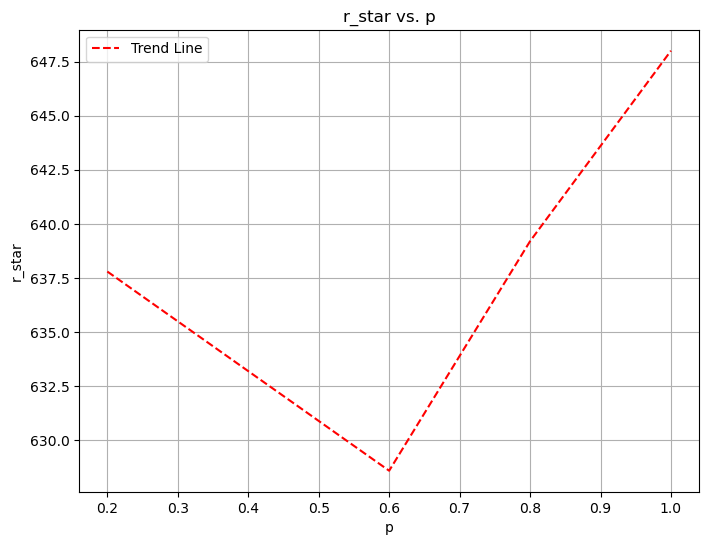

In [32]:
plt.figure(figsize=(8, 6))
print(r_star_for_p)
plt.plot(ps, r_star_for_p, color='red', linestyle='--', label='Trend Line')
plt.xlabel("p")
plt.ylabel("r_star")
plt.title("r_star vs. p")
plt.grid(True)
plt.legend()
plt.show()

# Problem 2: Image Inpainting

In [1]:
from PIL import Image
from numpy import array
import numpy as np
img = array(Image.open("jinx_corrupted.png"), dtype=int)[:,:]
Known = (img > 0).astype(int)

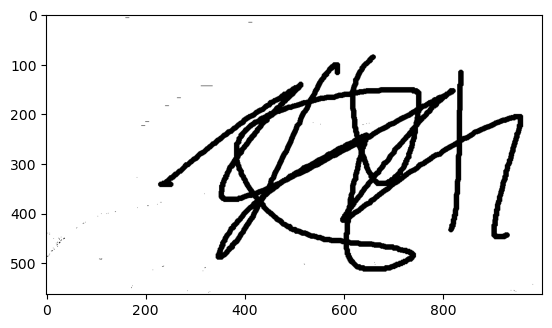

In [2]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(Known)
plt.show()

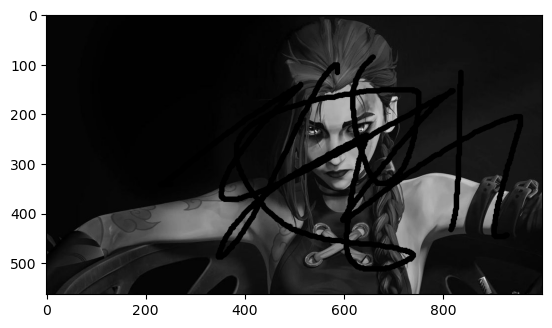

In [3]:
plt.imshow(img)
plt.show()

In [4]:
reconstructed_image = np.copy(img)
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[0]-1):
        reconstructed_image[i,j] = img[i-1, j] + img[i+1, j] + img[i,j-1] + img[i, j+1]
        number_known = Known[i-1, j] + Known[i+1, j] + Known[i,j-1] + Known[i, j+1]
        number_known = max(number_known, 1)
        reconstructed_image[i,j] /= number_known

3141.0


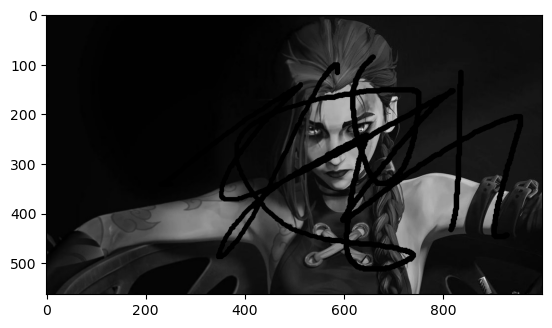

In [5]:
print(np.linalg.norm(reconstructed_image - img, 1))
plt.imshow(reconstructed_image)
plt.show()

In [6]:
from cvxpy import Variable, Minimize, Problem, multiply, tv
U = Variable(img.shape)
obj = Minimize(tv(U))
constraints = [multiply(Known, U) == multiply(Known, img)]
prob = Problem(obj, constraints)
prob.solve(verbose=True)
#the recovered image is now in U.value

                                     CVXPY                                     
                             v1.6.1.dev0+0.1777eb0                             
(CVXPY) Feb 24 08:17:17 PM: Your problem has 563000 variables, 563000 constraints, and 0 parameters.
(CVXPY) Feb 24 08:17:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 24 08:17:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 24 08:17:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 24 08:17:17 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 24 08:17:17 PM: Compiling problem (target solver=CL

1704972.259730186

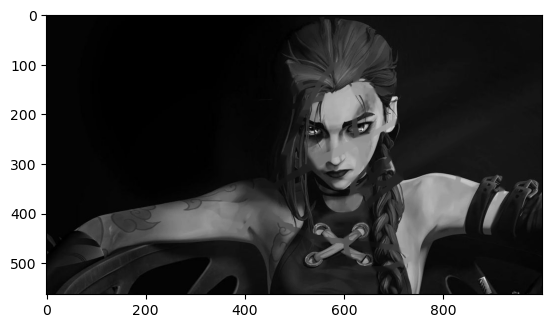

In [8]:
plt.imshow(U.value)
plt.show()

### 2(c)
The documentation says $$\mathrm{tv}(X) = \sum_{i,j} \sqrt{(X_{i+1,j} - X_{i,j})^2 + (X_{i,j+1} - X_{i,j})^2}.$$
For a fixed pair of $(i,j)$, if we let $Y^X_{i,j} = \begin{pmatrix} X_{i+1,j} - X_{i,j} \\ X_{i,j+1} - X_{i,j} \end{pmatrix}$, then $i,j$ term of this sum is just $\|Y^X_{i,j}\|_2$. Then for any other matrix $Z$, the $(i,j)$ term of $\mathrm{tv}(tX + (1-t)Z)$ is just $$\|tY^X_{i,j} + (1-t)Y^Z_{i,j}\| \leq t\|Y^X_{i,j}\| + (1-t)\|Y^Z_{i,j}\|.$$ since any norm is convex (this follows by triangle inequality and $\|\lambda x\| = |\lambda| \|x\|$.) Applying this for every term in the sum, and using linearity shows that $\mathrm{tv}(tX + (1-t)Z) \leq t\mathrm{tv}(X) + (1-t)\mathrm{tv}(Z)$.

### 2(d)
The full LP is as follows:
\begin{align*}
&\min \sum_{i,j} \sqrt{(X_{i+1,j}-X_{i,j})^2 + (X_{i,j+1}-X_{i,j})^2} \\
&\text{s.t. } X_{i,j} = \mathrm{Img}[i,j] \text{ for each known pixel $(i,j)$ of Img}
\end{align*}
The term we are minimizing, $\mathrm{tv}(X)$, is called tv since it represents total variation of the image. In computer vision, we compute discrete gradients by taking $A[i+1,j] - A[i,j]$ for the gradient in the $y$ direction (down cols) and $A[i,j+1] - A[j]$ for the gradient in the $x$ direction (across rows). So, we are trying to minimize the gradients of the image, or how much variation you see throughout the image. Real-world images don't have that much local variation. For example, if you look at a blue sky, you won't see huge changes locally, since the sky should be relatively constantly blue. Similarly, on her left arm, it is white, and if you were to zoom in you would think you are looking at a fully white image. From this intuition, we reason if we look among all images that are equal to the values we have known, we should reconstruct an image with small variation, which should look like a real-world image.

### 2(e)
$\ell^1$ norm is best when you are looking for sparse solutions. However, most real-world images are not sparse. For example, most pictures of the real world are not mostly black. So, instead, you want to minimize the amount of variation you see throughout the image, as we explained above, since that's what is a good measure of real-world images. I believe he mentioned in class that if you take a (discrete) fourier transform, the frequencies look sparse. So you could theoretically do a DFT, do the l1 minimization LP that we did for the first question, and go back, and this would work. But if we just work with the raw images, they have small total variation, instead of being sparse.


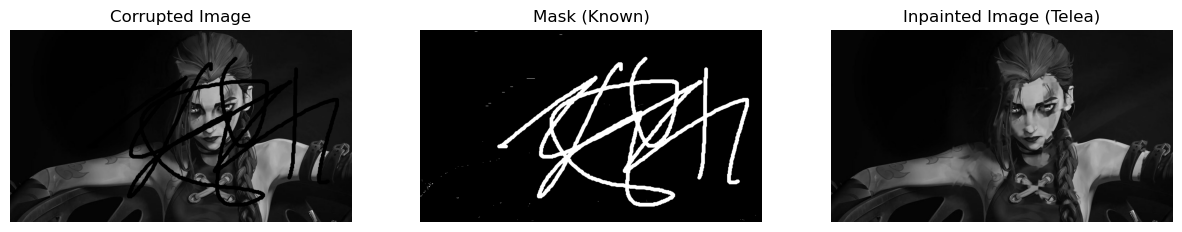

True

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the corrupted image
image = cv2.imread('jinx_corrupted.png')
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Assume 'Known' is your mask variable (0/1, with 1 = known, 0 = unknown)
# Invert the mask and convert to 8-bit (0 = known, 255 = unknown)
mask = (1 - Known).astype(np.uint8) * 255

# Inpaint the corrupted areas using Telea's algorithm
inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Corrupted Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Mask (Known)")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Inpainted Image (Telea)")
plt.imshow(cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Save the inpainted image
cv2.imwrite('jinx_inpainted.png', inpainted_image)
